In [1]:
import os
import sys
from functools import partial
import h5py as h5

import numpy as np
import matplotlib.pyplot as plt

from diffusion import disc2D, space3D, ach_2D, ach_3D, glut_2D, glut_3D
import graph_builds as gb
from figs import total_open, binding_modulation_run
import utils

sys.path.append("../ei-balance")
from general_utils import clean_axes, map_data

In [2]:
%matplotlib widget
plt.rcParams.update({"figure.max_open_warning": 0})
plt.rcParams['svg.fonttype'] = 'none'  # don't save font as paths (assumes font present on machine)

In [3]:
base_path = "/mnt/Data/kinetics_revisited/"
fig_path = os.path.join(base_path, "figs")
os.makedirs(fig_path, exist_ok=True)
exts = [".svg", ".png"]

In [4]:
a7_builder = gb.loader(gb.alpha7)
a3_builder = gb.loader(gb.alpha3)
prox_func = ach_2D(0.0)
distal_func = ach_2D(1.1e-6)
prox3D_func = ach_3D(0.0)
distal3D_func = ach_3D(1.1e-6)

a7_prox = a7_builder(agonist_func=prox_func)
a7_distal = a7_builder(agonist_func=distal_func)
a3_prox = a3_builder(agonist_func=prox_func)
a3_distal = a3_builder(agonist_func=distal_func)

a7_open_prox = a7_prox.run()["A2R*"]
a7_open_distal = a7_distal.run()["A2R*"]
a3_open_prox = a3_prox.run()["A2R*"]
a3_open_distal = a3_distal.run()["A2R*"]

time = a7_prox.time
dt = a7_prox.time[1] - a7_prox.time[0]
diffusion_t = a3_prox.time / 1000
prox_agonist = prox_func(diffusion_t) 
distal_agonist = distal_func(diffusion_t)
prox3D_agonist = prox3D_func(diffusion_t)
distal3D_agonist = distal3D_func(diffusion_t)

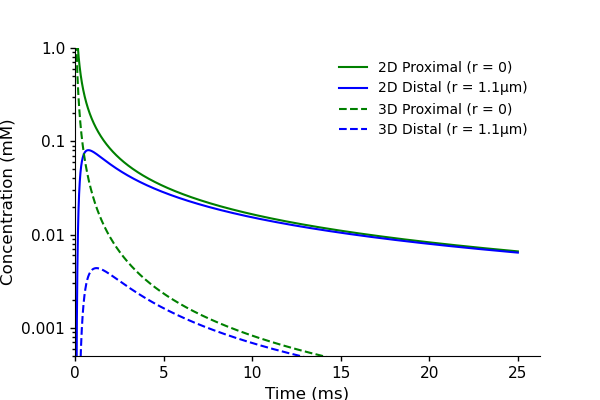

In [5]:
diffusion_fig, diffusion_ax = plt.subplots(1, figsize=(6, 4))

diffusion_ax.plot(a3_prox.time, prox_agonist, c="green", label="2D Proximal (r = 0)")
diffusion_ax.plot(a3_prox.time, distal_agonist, c="blue", label="2D Distal (r = 1.1μm)")
diffusion_ax.plot(a3_prox.time, prox3D_agonist, c="green", linestyle="--", label="3D Proximal (r = 0)")
diffusion_ax.plot(a3_prox.time, distal3D_agonist, c="blue", linestyle="--", label="3D Distal (r = 1.1μm)")
diffusion_ax.set_xlabel("Time (ms)", fontsize=12)
diffusion_ax.set_ylabel("Concentration (mM)", fontsize=12)
diffusion_ax.set_yscale("log")
diffusion_ax.set_xlim(0)
diffusion_ax.set_ylim(5e-4, 1)
yticks = [10e-4 * 10 ** i for i in range(4)]
diffusion_ax.set_yticks(yticks)
diffusion_ax.set_yticklabels(yticks)

diffusion_ax.legend(frameon=False)
clean_axes(diffusion_ax)

for ext in exts:
    diffusion_fig.savefig(os.path.join(fig_path, "diffusion_2D_vs_3D" + ext), bbox_inches="tight")

### Diffusion 2D alpha3 vs alpha7 comparison

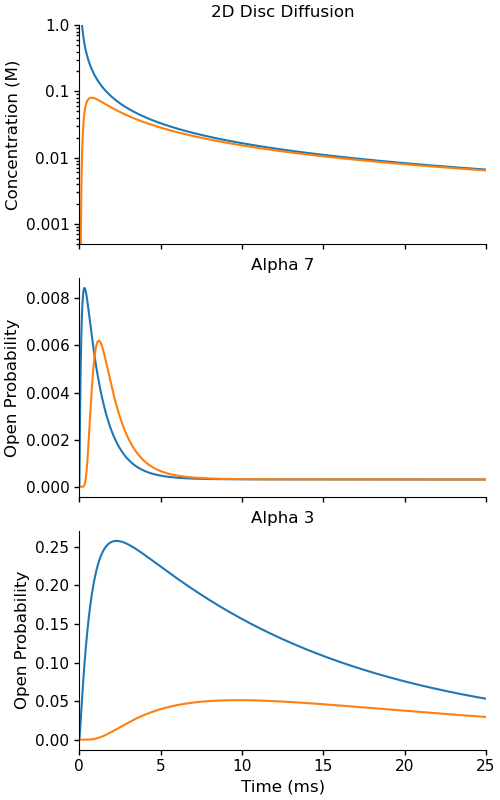

In [22]:
alpha3_vs_7_fig, alpha3_vs_7_ax = plt.subplots(3, sharex=True, figsize=(5, 8))

alpha3_vs_7_ax[0].plot(a3_prox.time, prox_agonist, label="Proximal (r = 0)")
alpha3_vs_7_ax[0].plot(a3_prox.time, distal_agonist, label="Distal (r = 1.1μm)")
alpha3_vs_7_ax[0].set_ylabel("Concentration (M)", fontsize=12)
alpha3_vs_7_ax[0].set_yscale("log")
alpha3_vs_7_ax[0].set_ylim(5e-4, 1)
yticks = [10e-4 * 10 ** i for i in range(4)]
alpha3_vs_7_ax[0].set_yticks(yticks)
alpha3_vs_7_ax[0].set_yticklabels(yticks)
alpha3_vs_7_ax[0].set_title("2D Disc Diffusion")

alpha3_vs_7_ax[1].plot(a7_prox.time, a7_open_prox, label="Proximal (r = 0)")
alpha3_vs_7_ax[1].plot(a7_distal.time, a7_open_distal, label="Distal (r = 1.1μm)")
alpha3_vs_7_ax[1].set_ylabel("Open Probability", fontsize=12)
alpha3_vs_7_ax[1].set_title("Alpha 7")

alpha3_vs_7_ax[2].plot(a3_prox.time, a3_open_prox, label="Proximal (r = 0)")
alpha3_vs_7_ax[2].plot(a3_distal.time, a3_open_distal, label="Distal (r = 1.1μm)")
alpha3_vs_7_ax[2].set_xlim(0, 25)
alpha3_vs_7_ax[2].set_xlabel("Time (ms)", fontsize=12)
alpha3_vs_7_ax[2].set_ylabel("Open Probability", fontsize=12)
alpha3_vs_7_ax[2].set_title("Alpha 3")

clean_axes(alpha3_vs_7_ax)
alpha3_vs_7_fig.set_layout_engine("compressed")

for ext in exts:
    name = "nACHR_2D_diffusion_comparison" + ext
    alpha3_vs_7_fig.savefig(os.path.join(fig_path, name), bbox_inches="tight")

### Diffusion 2D alpha6 vs alpha7 comparison

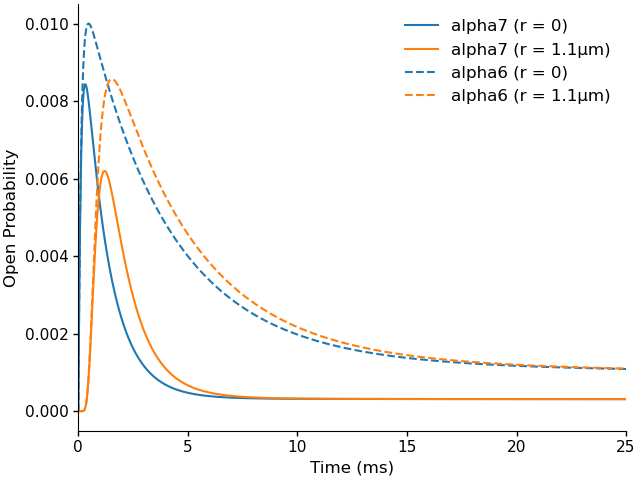

In [7]:
a6_builder = gb.loader(gb.alpha7, desens_div=4)
a6_prox = a6_builder(agonist_func=prox_func)
a6_distal = a6_builder(agonist_func=distal_func)
a6_prox3D = a6_builder(agonist_func=prox3D_func)
a6_distal3D = a6_builder(agonist_func=distal3D_func)

a6_open_prox = a6_prox.run()["A2R*"]
a6_open_distal = a6_distal.run()["A2R*"]
a6_open_prox3D = a6_prox3D.run()["A2R*"]
a6_open_distal3D = a6_distal3D.run()["A2R*"]

alpha6_vs_7_fig, alpha6_vs_7_ax = plt.subplots(1)
alpha6_vs_7_ax.plot(a7_prox.time, a7_open_prox, c="C0", label="alpha7 (r = 0)")
alpha6_vs_7_ax.plot(a7_prox.time, a7_open_distal, c="C1", label="alpha7 (r = 1.1μm)")
alpha6_vs_7_ax.plot(a6_prox.time, a6_open_prox, c="C0", label="alpha6 (r = 0)", linestyle="--")
alpha6_vs_7_ax.plot(a6_prox.time, a6_open_distal, c="C1", label="alpha6 (r = 1.1μm)", linestyle="--")
alpha6_vs_7_ax.set_xlim(0, 25)

alpha6_vs_7_ax.set_ylabel("Open Probability", fontsize=12)
alpha6_vs_7_ax.set_xlabel("Time (ms)", fontsize=12)
alpha6_vs_7_ax.legend(frameon=False, fontsize=12)

clean_axes(alpha6_vs_7_ax)
alpha6_vs_7_fig.set_layout_engine("compressed")

for ext in exts:
    alpha3_vs_7_fig.savefig(os.path.join(fig_path, "alpha7_vs_alpha6" + ext), bbox_inches="tight")

### alpha6 vs alpha7 increasing radii 

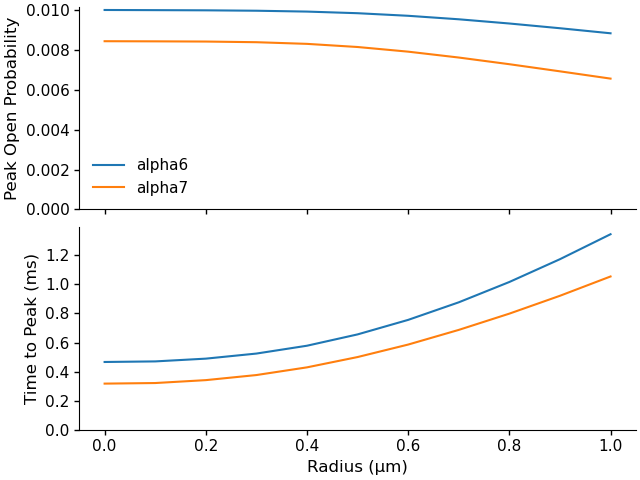

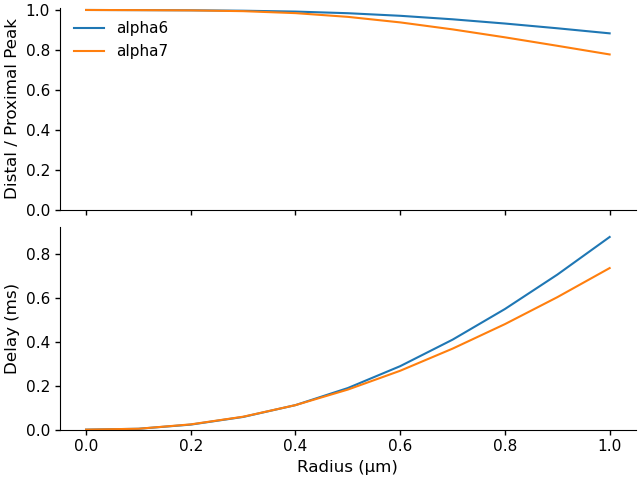

In [8]:
radius_max = 1.1
radius_step = 0.1
radii = np.arange(0, radius_max, radius_step)

builders = {
    # "alpha3": a3_builder,
    "alpha6": a6_builder,
    "alpha7": a7_builder,
}
ach_fun, space_lbl = ach_2D, "2D"
# ach_fun, space_lbl = ach_3D, "3D"

probs = {
    n: np.stack([total_open(bldr(agonist_func=ach_fun(r * 1e-6)).run()) for r in radii], axis=0)
    for n, bldr in builders.items()
}
peaks = map_data(partial(np.max, axis=1), probs)
delays = map_data(lambda ps: np.argmax(ps, axis=1) * dt, probs)

rads_fig, rads_ax = plt.subplots(2, sharex=True)
for n in builders.keys():
    rads_ax[0].plot(radii, peaks[n], label=n)
    rads_ax[1].plot(radii, delays[n])
rads_ax[0].set_ylim(0)
rads_ax[1].set_ylim(0)

rads_ax[0].set_ylabel("Peak Open Probability", fontsize=12)
rads_ax[1].set_ylabel("Time to Peak (ms)", fontsize=12)
rads_ax[1].set_xlabel("Radius (μm)", fontsize=12)

comp_fig, comp_ax = plt.subplots(2, sharex=True)

for n in builders.keys():
    comp_ax[0].plot(radii, peaks[n] / peaks[n][0], label=n)
    comp_ax[1].plot(radii, delays[n] - delays[n][0])
comp_ax[0].set_ylim(0)
comp_ax[1].set_ylim(0)

comp_ax[0].set_ylabel("Distal / Proximal Peak", fontsize=12)
comp_ax[1].set_ylabel("Delay (ms)", fontsize=12)
comp_ax[1].set_xlabel("Radius (μm)", fontsize=12)

clean_axes(rads_ax)
clean_axes(comp_ax)
rads_ax[0].legend(frameon=False, fontsize=11)
comp_ax[0].legend(frameon=False, fontsize=11)
rads_fig.set_layout_engine("compressed")
comp_fig.set_layout_engine("compressed")

recep_lbls = "_".join(builders.keys())
name = "%s_radii_max%s_step%s_ach%s" % (
    recep_lbls, str(radius_max).replace(".", "p"), str(radius_step).replace(".", "p"), space_lbl)
for ext in exts:
    rads_fig.savefig(os.path.join(fig_path, "%s%s" % (name, ext)), bbox_inches="tight")
    comp_fig.savefig(os.path.join(fig_path, "%s_prox_vs_distal%s" % (name, ext)), bbox_inches="tight")

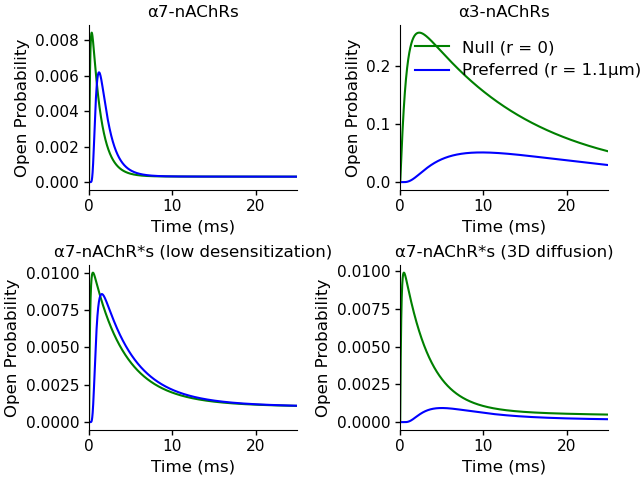

In [9]:
alpha_quad_panel_fig, alpha_quad_panel_ax = plt.subplots(2, 2)
alpha_quad_panel_ax[0, 0].plot(a7_prox.time, a7_open_prox, c="green", label="Null (r = 0)")
alpha_quad_panel_ax[0, 0].plot(a7_prox.time, a7_open_distal, c="blue", label="Preferred (r = 1.1μm)")
alpha_quad_panel_ax[0, 0].set_title("α7-nAChRs")
alpha_quad_panel_ax[0, 1].plot(a3_prox.time, a3_open_prox, c="green", label="Null (r = 0)")
alpha_quad_panel_ax[0, 1].plot(a3_prox.time, a3_open_distal, c="blue", label="Preferred (r = 1.1μm)")
alpha_quad_panel_ax[0, 1].set_title("α3-nAChRs")
alpha_quad_panel_ax[1, 0].plot(a6_prox.time, a6_open_prox, c="green", label="Null (r = 0)")
alpha_quad_panel_ax[1, 0].plot(a6_prox.time, a6_open_distal, c="blue", label="Preferred (r = 1.1μm)")
alpha_quad_panel_ax[1, 0].set_title("α7-nAChR*s (low desensitization)")
alpha_quad_panel_ax[1, 1].plot(a6_prox.time, a6_open_prox3D, c="green", label="Null (r = 0)")
alpha_quad_panel_ax[1, 1].plot(a6_prox.time, a6_open_distal3D, c="blue", label="Preferred (r = 1.1μm)")
alpha_quad_panel_ax[1, 1].set_title("α7-nAChR*s (3D diffusion)")

for row in alpha_quad_panel_ax:
    for ax in row:
        ax.set_xlim(0, 25)
        ax.set_ylabel("Open Probability", fontsize=12)
        ax.set_xlabel("Time (ms)", fontsize=12)

alpha_quad_panel_ax[0, 1].legend(frameon=False, fontsize=12)

clean_axes(alpha_quad_panel_ax)
# alpha_quad_panel_fig.set_layout_engine("constrained")
alpha_quad_panel_fig.set_layout_engine("compressed")
# alpha_quad_panel_fig.set_layout_engine("tight")

for ext in exts:
    alpha_quad_panel_fig.savefig(os.path.join(fig_path, "alpha_quad_panel" + ext), bbox_inches="tight")

/mnt/Data/kinetics_revisited/binding_mod/alpha7_rate_mod.hdf


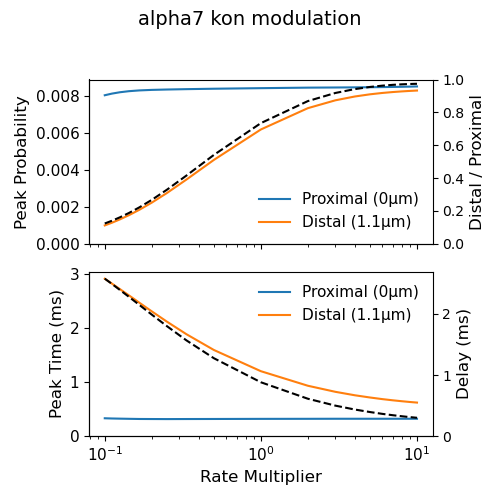

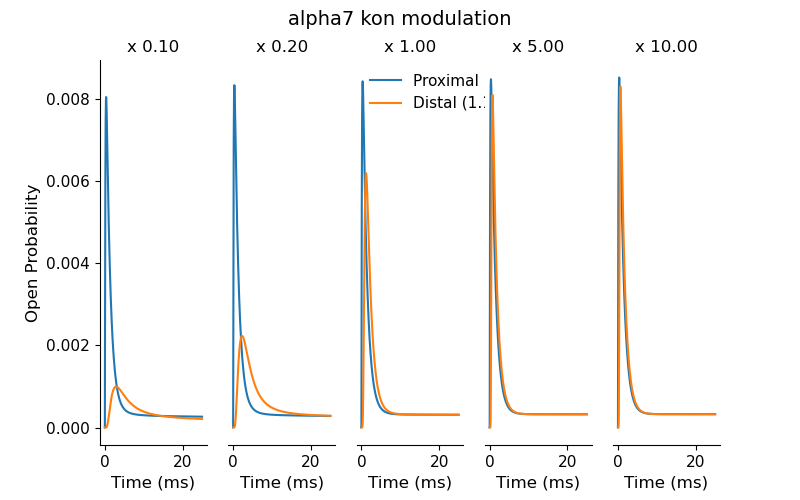

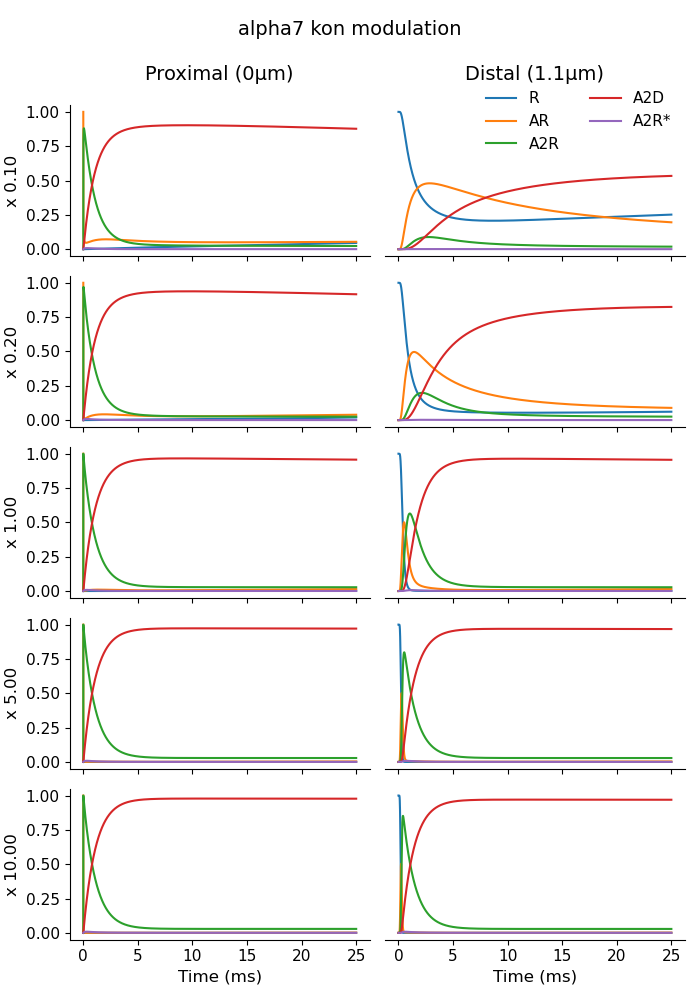

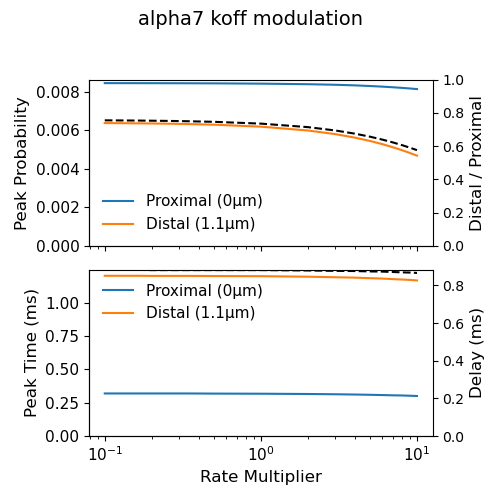

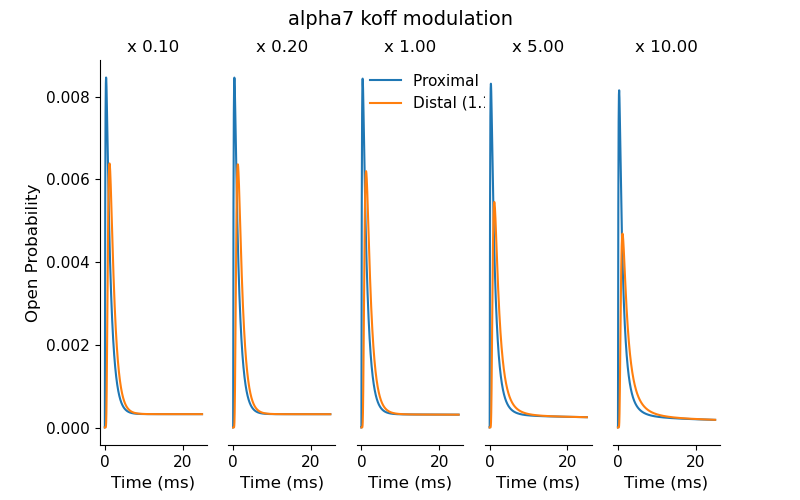

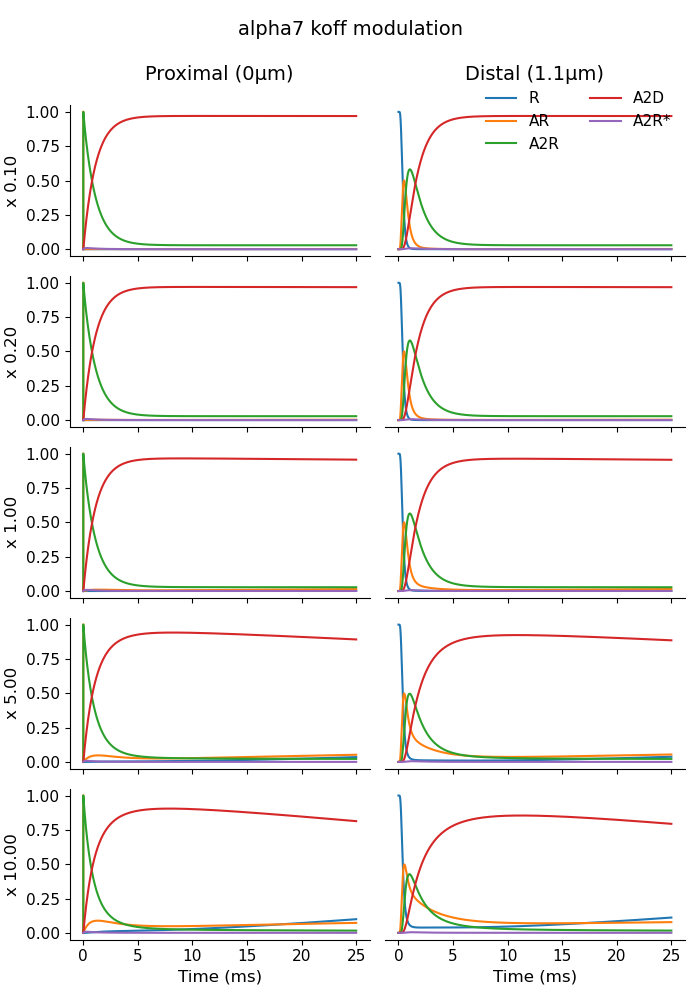

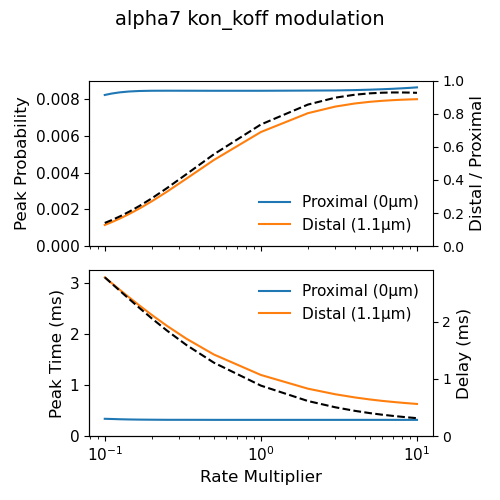

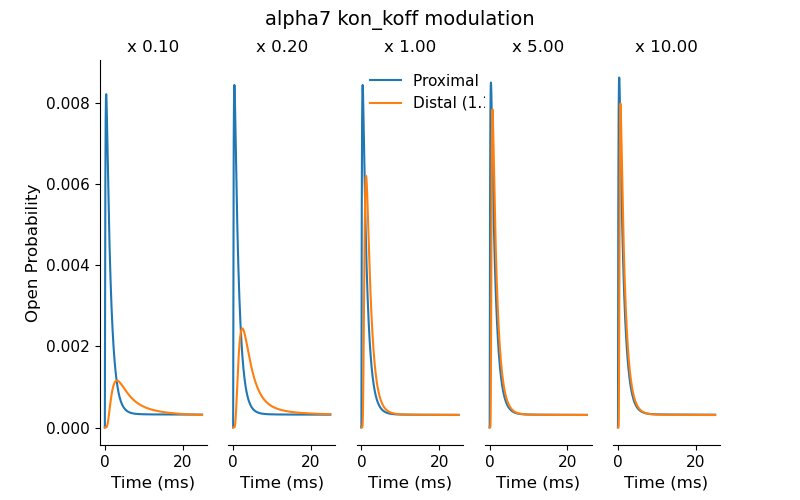

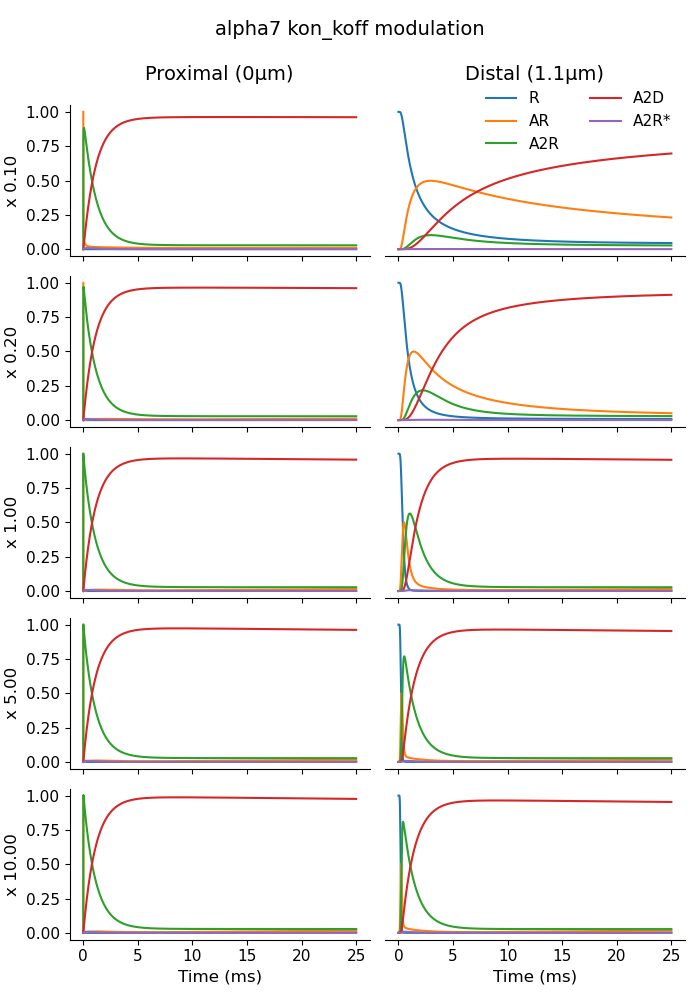

In [13]:
load_mod_run = False
mod_run_path = os.path.join(base_path, "binding_mod")
os.makedirs(mod_run_path, exist_ok=True)
bldr_name, bldr = "alpha7", a7_builder
# bldr_name, bldr = "alpha3", a3_builder
mod_run_name = os.path.join(mod_run_path, "%s_rate_mod.hdf" % bldr_name)
print(mod_run_name)
if load_mod_run and os.path.exists(mod_run_name):
    print("Loading existing binding modulation run...")
    with h5.File(mod_run_name) as data:
        mod_run = utils.unpack_hdf(data)
else: 
    mod_run = binding_modulation_run(
        mod_run_path, bldr, mul_range=10, make_figs=True, dist_over_prox=True, fmts=["png", "svg"]
    )

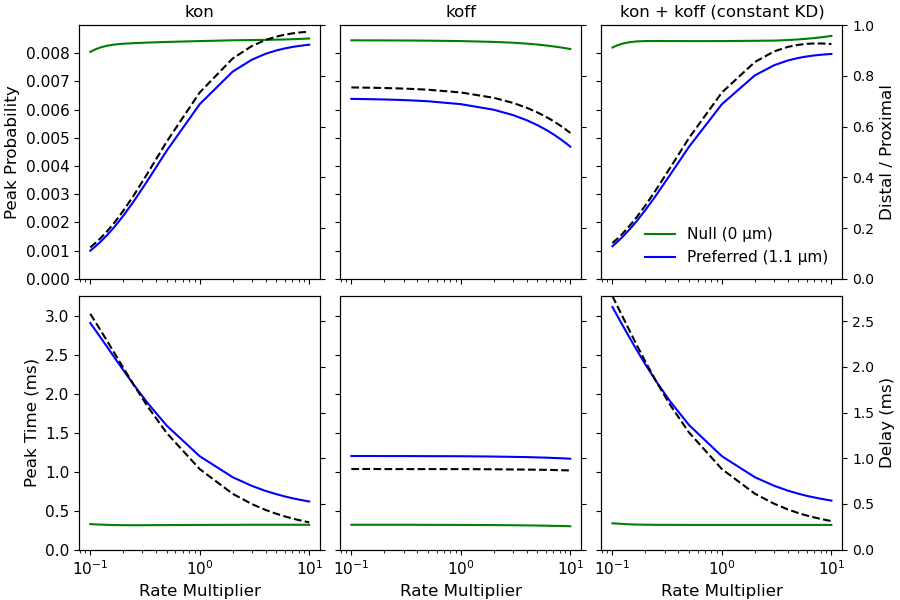

In [18]:
dist_over_prox = True
prox_lbl, prox_clr = "Null (0 μm)", "green"
dist_lbl, dist_clr = "Preferred (1.1 μm)", "blue"

k_conds = ["kon", "koff", "kon_koff"]
ratio_lbl = "Distal / Proximal" if dist_over_prox else "Proximal / Distal"
multis = mod_run["multis"]
binding_metrics_fig, binding_metrics_ax = plt.subplots(2, 3, sharex=True, sharey="row", figsize=(9, 6))
binding_metrics_axr = [[a.twinx() for a in row] for row in binding_metrics_ax]

binding_delays = {
    k: mod_run[k]["metrics"]["distal"]["peak_time"] - mod_run[k]["metrics"]["prox"]["peak_time"]
    for k in k_conds
}
max_delay = max(map(np.max, binding_delays.values()))

for i, k in enumerate(k_conds):
    metrics = mod_run[k]["metrics"]
    binding_metrics_ax[0][i].plot(multis, metrics["prox"]["peak"], c=prox_clr, label=prox_lbl)
    binding_metrics_ax[0][i].plot(multis, metrics["distal"]["peak"], c=dist_clr, label=dist_lbl)
    title = "kon + koff (constant KD)" if k == "kon_koff" else k
    binding_metrics_ax[0][i].set_title(title)
    
    ratio = (
        (metrics["distal"]["peak"] / metrics["prox"]["peak"])
        if dist_over_prox
        else (metrics["prox"]["peak"] / metrics["distal"]["peak"])
    )
    binding_metrics_axr[0][i].plot(multis, ratio, c="black", linestyle="--")
    binding_metrics_axr[0][i].set_ylim(0, 1 if dist_over_prox else None)
    
    binding_metrics_ax[1][i].plot(multis, metrics["prox"]["peak_time"], c=prox_clr)
    binding_metrics_ax[1][i].plot(multis, metrics["distal"]["peak_time"], c=dist_clr)
    binding_metrics_axr[1][i].plot(multis, binding_delays[k], c="black", linestyle="--")
    binding_metrics_axr[1][i].set_ylim(0, max_delay)
    
    binding_metrics_ax[1][i].set_xscale("log")
    binding_metrics_ax[1][i].set_xlabel("Rate Multiplier", fontsize=12)
    
for row in binding_metrics_ax:
    for a in row:
        for ticks in a.get_xticklabels() + a.get_yticklabels():
            ticks.set_fontsize(11)
            
for row in binding_metrics_axr:
    for a in row[:-1]:
        a.set_yticklabels([])
        # a.sharey(row[-1])

binding_metrics_ax[0][0].set_ylim(0)
binding_metrics_ax[1][0].set_ylim(0)
binding_metrics_ax[0][0].set_ylabel("Peak Probability", fontsize=12)
binding_metrics_axr[0][-1].set_ylabel(ratio_lbl, fontsize=12)
binding_metrics_ax[1][0].set_ylabel("Peak Time (ms)", fontsize=12)
binding_metrics_axr[1][-1].set_ylabel("Delay (ms)", fontsize=12)
binding_metrics_ax[0][-1].legend(frameon=False, fontsize=11)
binding_metrics_fig.set_layout_engine("compressed")

for ext in exts:
    binding_metrics_fig.savefig(os.path.join(fig_path, "%s_binding_modulation_metrics%s" % (bldr_name, ext)), bbox_inches="tight")

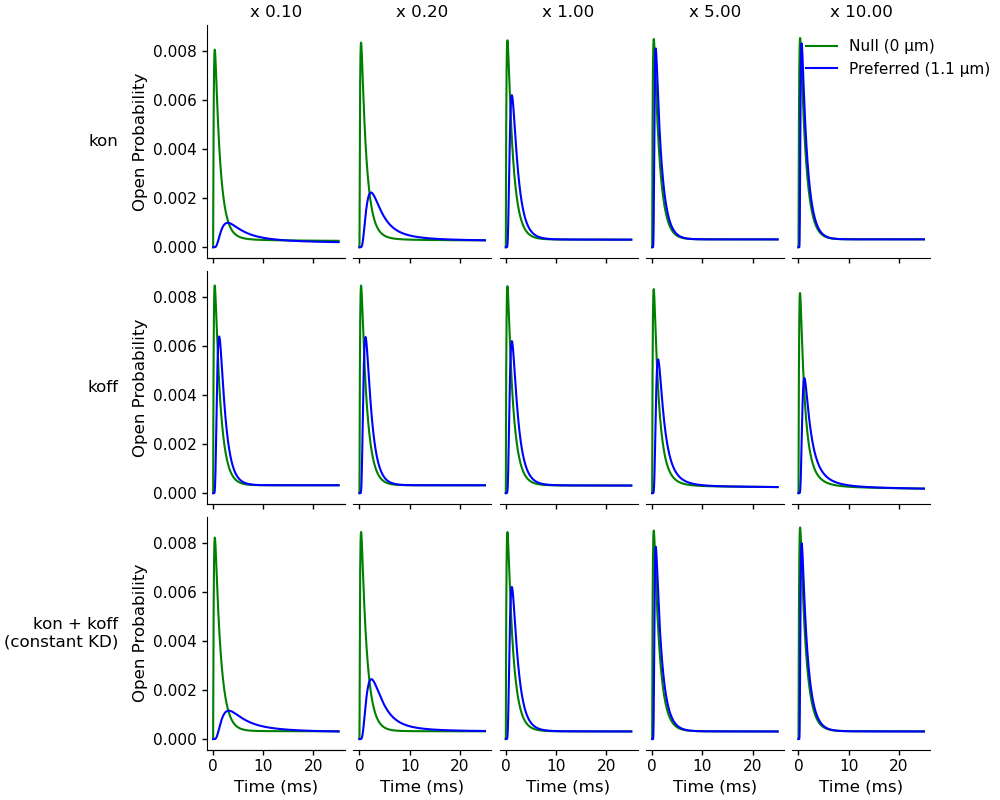

In [19]:
n = len(multis)
idxs = [0, n // 4 + 1, n // 2, n // 2 + n // 4, n - 1]

binding_probs_fig, binding_probs_ax = plt.subplots(
    len(k_conds), len(idxs), sharex=True, sharey=True, figsize=(10, 8))

for i, k in enumerate(k_conds):
    ax = binding_probs_ax[i]
    prox_probs = mod_run[k]["probs"]["prox"][idxs]
    distal_probs = mod_run[k]["probs"]["distal"][idxs]
    lbl = "kon + koff\n(constant KD)" if k == "kon_koff" else k
    for a, m, prox, distal in zip(ax, multis[idxs], prox_probs, distal_probs):
        a.plot(time, prox, c=prox_clr, label=prox_lbl)
        a.plot(time, distal, c=dist_clr, label=dist_lbl)
        if not i: a.set_title("x %.2f" % m, fontsize=12)
    
    ax[0].set_ylabel("Open Probability", fontsize=12)
    
    for a in ax[1:]:
        a.spines["left"].set_visible(False)
        a.yaxis.set_ticks_position("none")
    
    # add dummy ax for row label
    lbl_ax = ax[0].twinx()
    lbl_ax.yaxis.set_label_position('left')
    lbl_ax.spines["left"].set_position(('axes', -0.6))
    lbl_ax.spines["left"].set_visible(False)
    lbl_ax.spines["top"].set_visible(False)
    lbl_ax.spines["right"].set_visible(False)
    lbl_ax.set_yticks([])
    lbl_ax.set_ylabel(lbl, rotation=0, size='large', ha='right', va='center')

for a in binding_probs_ax[-1]:
    a.set_xlabel("Time (ms)", fontsize=12)
binding_probs_ax[0, -1].legend(frameon=False, fontsize=11) 

clean_axes(binding_probs_ax, ticksize=11)
binding_probs_fig.set_layout_engine("compressed")

for ext in exts:
    binding_probs_fig.savefig(os.path.join(fig_path, "%s_binding_modulation_probs%s" % (bldr_name, ext)), bbox_inches="tight")